In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from io import StringIO
import requests

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pre-Processing

In [2]:
#Read csv data

df = pd.read_csv('ML_2_Fellow.csv', encoding = 'unicode_escape')
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df[df.Jumlah<0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [4]:
#Describe the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


The datafreame consists of 2 datatype which are object and float64

In [5]:
#describe stats condition of data

df.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


We can see from the picture above that the counts of Jumlah, Harga_Satuan, and Kode_Pelanggan are lower than rows number in dataframe. It means there must be some missing values in those columns. Besides, if we compared between the max value and percentile of 75% for Jumlah and Harga_Satuan columns, there is a large gap. It probably indicates that there are some outliers in the data.

In [6]:
#Describe data for categorical data

df.describe(include='O')

,Kode_Bayar,Kode_Barang,Barang,Tanggal_Transaksi,Negara
count,541909,535874,534420,535874,535874
unique,31847,3999,4113,23225,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1101,2313,2369,1101,489721


We can see from the count of each column, except Kode_Bayar, there must be some missing values since the counts of data are lower than the rows number in dataframe. We can also see that "WHITE HANGING HEART T-LIGHT HOLDER" is the item that sells the most with the frequency of 2369, While United Kingdom is a the highest export destination country with the frequency of 489721.

In [7]:
#Identifying Top 10 Items Sold and Top 10 Export Destination Countries

for x in ['Barang', 'Negara']:
          print(df[x].value_counts().head(10))
          print("================================")

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Barang, dtype: int64
United Kingdom    489721
Germany             9448
France              8525
EIRE                8138
Spain               2513
Netherlands         2355
Belgium             2060
Switzerland         1991
Portugal            1514
Australia           1251
Name: Negara, dtype: int64


WHITE HANGING HEART T-LIGHT HOLDER is the most item sold, while United Kingdom is the highest export destination country

In [8]:
#Identifying duplicated/redundant values in dataframe

df.duplicated().sum()

5268

There are 5268 duplicated values in dataframe which will be treated later in data cleansing process

In [9]:
#Identifying duplicated/redundant values in dataframe

df.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

As expected earlier that there are some outliers in dataframe. Kode_Pelanggan is the highest column with the highest null values. Missing values treatment will be conducted later in data cleansing process

## Exploratory Data Analysis (EDA)

In [10]:
df.Barang.count()

534420

In [11]:
dfbrg = df.groupby('Barang').agg({'Jumlah':'sum','Harga_Satuan': 'sum'}).reset_index().rename(columns={'Harga_Satuan':'totalpenjualan'})
dfbrg.sort_values(by='Jumlah', ascending=False)

,Barang,Jumlah,totalpenjualan
3903,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847.0,173.39
1822,JUMBO BAG RED RETROSPOT,47363.0,5333.30
235,ASSORTED COLOUR BIRD ORNAMENT,36381.0,2584.77
2657,POPCORN HOLDER,36334.0,874.50
2318,PACK OF 72 RETROSPOT CAKE CASES,36039.0,1047.04
...,...,...,...
4084,throw away,-5368.0,0.00
1099,Damaged,-7540.0,0.00
2713,Printing smudges/thrown away,-9058.0,0.00
4008,check,-12030.0,0.00


In [12]:
dfbrg['%jumlah'] = round(dfbrg.Jumlah/dfbrg.Jumlah.sum()*100, 2)
dfbrg['%totalpenjualan'] = round(dfbrg.totalpenjualan/dfbrg.totalpenjualan.sum()*100,2)
dfbrg.sort_values(by='Jumlah', ascending=False)

,Barang,Jumlah,totalpenjualan,%jumlah,%totalpenjualan
3903,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847.0,173.39,1.05,0.01
1822,JUMBO BAG RED RETROSPOT,47363.0,5333.30,0.92,0.21
235,ASSORTED COLOUR BIRD ORNAMENT,36381.0,2584.77,0.71,0.10
2657,POPCORN HOLDER,36334.0,874.50,0.71,0.04
2318,PACK OF 72 RETROSPOT CAKE CASES,36039.0,1047.04,0.70,0.04
...,...,...,...,...,...
4084,throw away,-5368.0,0.00,-0.10,0.00
1099,Damaged,-7540.0,0.00,-0.15,0.00
2713,Printing smudges/thrown away,-9058.0,0.00,-0.18,0.00
4008,check,-12030.0,0.00,-0.23,0.00


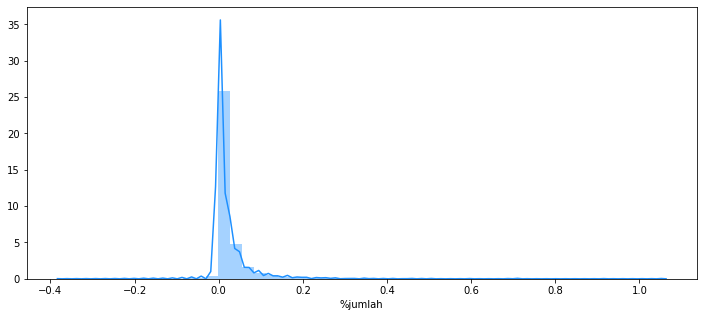

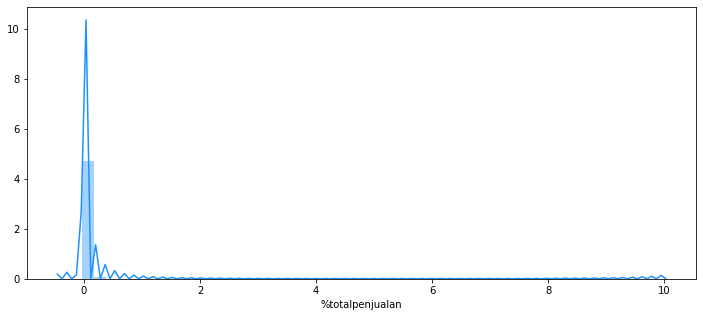

In [13]:
for col in ['%jumlah', '%totalpenjualan']:
    plt.figure(figsize=(12,5))
    sns.distplot(dfbrg[col], color='dodgerblue')
    plt.show()

The lower percentage, the less contribution given by items on sales. Overall, from all of items sold, most items only contribute 0 - 0.2% of sales. Besides, based on % of total price, we can see that most items only contribute 0 - 0.5% of sales.

In [14]:
top10brg = dfbrg.sort_values('Jumlah',ascending = False).head(10)
top10brg

,Barang,Jumlah,totalpenjualan,%jumlah,%totalpenjualan
3903,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847.0,173.39,1.05,0.01
1822,JUMBO BAG RED RETROSPOT,47363.0,5333.30,0.92,0.21
235,ASSORTED COLOUR BIRD ORNAMENT,36381.0,2584.77,0.71,0.10
2657,POPCORN HOLDER,36334.0,874.50,0.71,0.04
2318,PACK OF 72 RETROSPOT CAKE CASES,36039.0,1047.04,0.70,0.04
3813,WHITE HANGING HEART T-LIGHT HOLDER,35317.0,7590.87,0.69,0.31
2720,RABBIT NIGHT LIGHT,30680.0,2496.53,0.60,0.10
2086,MINI PAINT SET VINTAGE,26437.0,304.81,0.51,0.01
2284,PACK OF 12 LONDON TISSUES,26315.0,236.87,0.51,0.01
2316,PACK OF 60 PINK PAISLEY CAKE CASES,24753.0,664.13,0.48,0.03


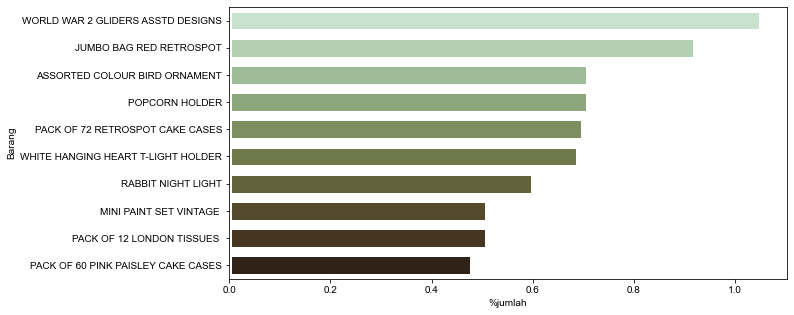

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x = top10brg['%jumlah'], y=top10brg.Barang, palette='ch:7', edgecolor= 'white', linewidth=5)
sns.set(style='darkgrid')
plt.show()

As we can see from the chart above, WORLD WAR 2 GLIDERS ASSTD DESIGNS is most sold item with the percentage of 1.05%.

In [16]:
top10hargabrg = dfbrg.sort_values('totalpenjualan',ascending = False).head(10)
top10hargabrg

,Barang,Jumlah,totalpenjualan,%jumlah,%totalpenjualan
163,AMAZON FEE,-30.0,249042.68,-0.00,10.02
2170,Manual,3165.0,214450.96,0.06,8.63
1074,DOTCOM POSTAGE,707.0,206252.06,0.01,8.30
2670,POSTAGE,3003.0,46388.47,0.06,1.87
2831,REGENCY CAKESTAND 3 TIER,13033.0,30360.61,0.25,1.22
2393,PARTY BUNTING,18022.0,9979.62,0.35,0.40
3103,SET OF 3 CAKE TINS PANTRY DESIGN,7336.0,8518.68,0.14,0.34
915,CRUK Commission,-16.0,7933.43,-0.00,0.32
904,CREAM SWEETHEART MINI CHEST,1751.0,7876.36,0.03,0.32
3813,WHITE HANGING HEART T-LIGHT HOLDER,35317.0,7590.87,0.69,0.31


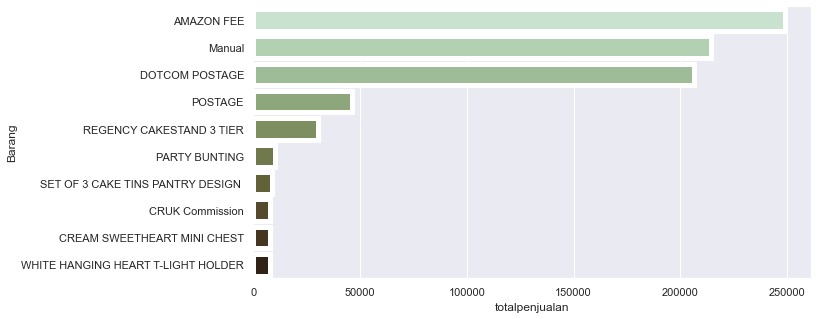

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = top10hargabrg['totalpenjualan'], y=top10hargabrg.Barang, palette='ch:7', edgecolor= 'white', linewidth=5)
sns.set(style='darkgrid')
plt.show()

Although WHITE HANGING HEART T-LIGHT HOLDER is the most sold item at supermarket, but item that has the highest total price is AMAZON FEE with total price of 249042.68 or contribute 10.02% of sales 

In [18]:
dfnegara = df.groupby("Negara").agg({'Jumlah': 'sum','Harga_Satuan': 'sum'}) \
.reset_index().rename(columns={'Jumlah': 'jumlahbarang', 'Harga_Satuan': 'totalpenjualan'})
dfnegara['totalpenjualan'] = dfnegara['totalpenjualan'].astype('int64')
dfnegara.sort_values(by='totalpenjualan', ascending=False)

,Negara,jumlahbarang,totalpenjualan
36,United Kingdom,4234487.0,2232102
10,EIRE,140493.0,48341
13,France,110089.0,42993
14,Germany,116832.0,37579
30,Singapore,5228.0,25097
27,Portugal,16132.0,13020
31,Spain,26585.0,12596
16,Hong Kong,4753.0,12226
3,Belgium,23094.0,7491
33,Switzerland,30161.0,6786


In [19]:
dfnegara['%jumlah'] = round(dfnegara.jumlahbarang/dfnegara.jumlahbarang.sum()*100, 2)
dfnegara['%totalpenjualan'] = round(dfnegara.totalpenjualan/dfnegara.totalpenjualan.sum()*100,2)
dfnegara.sort_values(by='jumlahbarang', ascending=False)

,Negara,jumlahbarang,totalpenjualan,%jumlah,%totalpenjualan
36,United Kingdom,4234487.0,2232102,82.42,89.84
24,Netherlands,198340.0,6472,3.86,0.26
10,EIRE,140493.0,48341,2.73,1.95
14,Germany,116832.0,37579,2.27,1.51
13,France,110089.0,42993,2.14,1.73
0,Australia,81613.0,4043,1.59,0.16
32,Sweden,35349.0,1801,0.69,0.07
33,Switzerland,30161.0,6786,0.59,0.27
31,Spain,26585.0,12596,0.52,0.51
20,Japan,24894.0,795,0.48,0.03


In [20]:
top10negarabarang = dfnegara.sort_values('jumlahbarang', ascending=False).head(10)
top10negarabarang

,Negara,jumlahbarang,totalpenjualan,%jumlah,%totalpenjualan
36,United Kingdom,4234487.0,2232102,82.42,89.84
24,Netherlands,198340.0,6472,3.86,0.26
10,EIRE,140493.0,48341,2.73,1.95
14,Germany,116832.0,37579,2.27,1.51
13,France,110089.0,42993,2.14,1.73
0,Australia,81613.0,4043,1.59,0.16
32,Sweden,35349.0,1801,0.69,0.07
33,Switzerland,30161.0,6786,0.59,0.27
31,Spain,26585.0,12596,0.52,0.51
20,Japan,24894.0,795,0.48,0.03


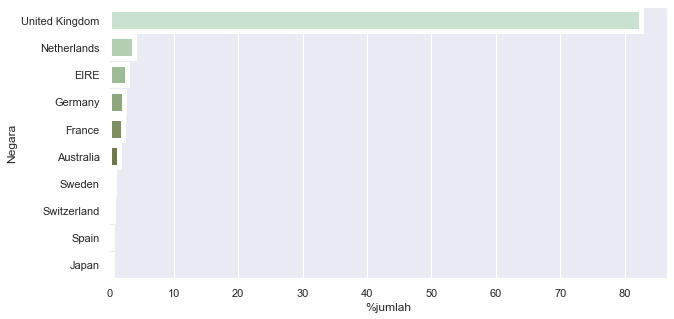

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(y = top10negarabarang.Negara, x=top10negarabarang['%jumlah'], palette='ch:7', edgecolor= 'white', linewidth=5)
sns.set(style='darkgrid')
plt.show()

It looks like United Kingdom is dominating the supermarket's export destination country with 82.42% or 4234487 items have sold there.

In [22]:
top10negaraharga = dfnegara.sort_values('totalpenjualan', ascending=False).head(10)
top10negaraharga

,Negara,jumlahbarang,totalpenjualan,%jumlah,%totalpenjualan
36,United Kingdom,4234487.0,2232102,82.42,89.84
10,EIRE,140493.0,48341,2.73,1.95
13,France,110089.0,42993,2.14,1.73
14,Germany,116832.0,37579,2.27,1.51
30,Singapore,5228.0,25097,0.10,1.01
27,Portugal,16132.0,13020,0.31,0.52
31,Spain,26585.0,12596,0.52,0.51
16,Hong Kong,4753.0,12226,0.09,0.49
3,Belgium,23094.0,7491,0.45,0.30
33,Switzerland,30161.0,6786,0.59,0.27


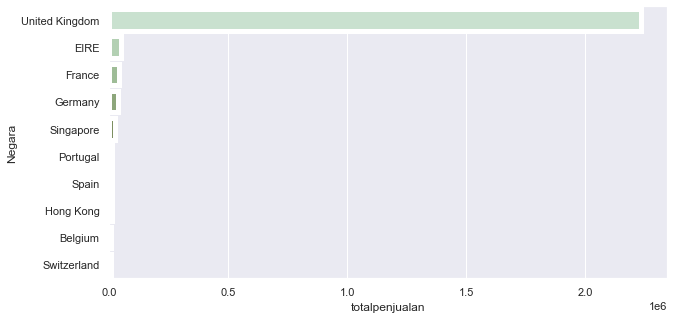

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(y = top10negaraharga.Negara, x=top10negaraharga['totalpenjualan'], palette='ch:7', edgecolor= 'white', linewidth=5)
sns.set(style='darkgrid')
plt.show()

Based on total price, most of the sales also come from United Kingdom with the total of 2232102 or contribute 89.84% of sales

In [24]:
#The most item bought by each country

i = df.groupby(['Negara','Barang'])['Jumlah'].sum()
i.groupby(level=0).nlargest(1).reset_index(level=0, drop=True).sort_values(ascending=False)

Negara                Barang                             
United Kingdom        WORLD WAR 2 GLIDERS ASSTD DESIGNS      48326.0
Netherlands           RABBIT NIGHT LIGHT                      4801.0
France                RABBIT NIGHT LIGHT                      4023.0
Japan                 RABBIT NIGHT LIGHT                      3401.0
Australia             MINI PAINT SET VINTAGE                  2916.0
Sweden                MINI PAINT SET VINTAGE                  2916.0
EIRE                  PACK OF 72 RETROSPOT CAKE CASES         1728.0
Germany               ROUND SNACK BOXES SET OF4 WOODLAND      1218.0
Spain                 CHILDRENS CUTLERY POLKADOT PINK          729.0
Switzerland           PLASTERS IN TIN WOODLAND ANIMALS         639.0
Norway                SMALL FOLDING SCISSOR(POINTED EDGE)      576.0
Canada                RETRO COFFEE MUGS ASSORTED               504.0
Belgium               PACK OF 72 RETROSPOT CAKE CASES          480.0
Finland               CHILDRENS CUTLERY POLKA

As we can see that United Kingdom as the highest export destination country buy  WORLD WAR 2 GLIDERS ASSTD DESIGNS the most with amounts of 48326 pcs

In [25]:
dftime = df.copy()

In [26]:
dftime['Tanggal_Transaksi'] = pd.to_datetime(dftime['Tanggal_Transaksi'])
dftime

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
dftime['month'] = dftime['Tanggal_Transaksi'].dt.month
dftime.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.0


In [28]:
dftime2 = dftime.groupby('month').agg({'Jumlah':'sum', 'Harga_Satuan': 'sum'}).reset_index().astype('int64')

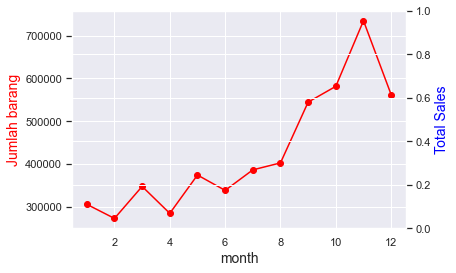

In [29]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(dftime2.month, dftime2.Jumlah, color="red", marker="o")
# set x-axis label
ax.set_xlabel("month",fontsize=14)
# set y-axis label
ax.set_ylabel("Jumlah barang",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object

ax2.set_ylabel("Total Sales",color="blue",fontsize=14)
plt.show()

As seen from the chart above, The items sales start to increase after August and reach its peak on November and December

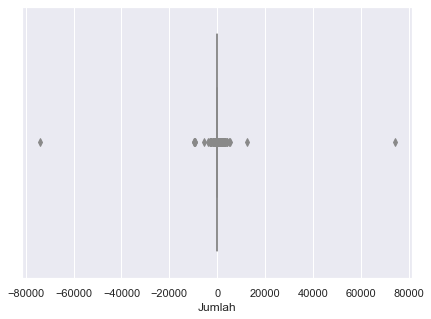

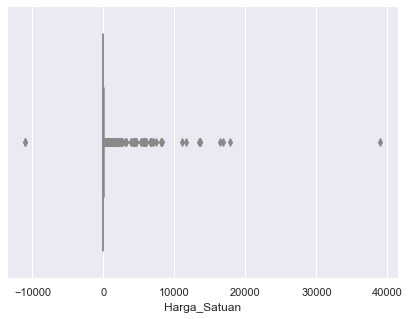

In [30]:
for col in ['Jumlah','Harga_Satuan']:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=df[col], palette='ch:11')

As expected earlier that there are some outliers in data, but I decide to not removing the outliers for further analysis

In [31]:
df.Barang.value_counts().median()

60.0

In [32]:
df['Barang'].value_counts().loc[lambda x : x<=60].count()

2064

## Data Cleansing

In [33]:
#Drop null values

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Kode_Pelanggan,138727,25.60
Barang,7489,1.38
Negara,6035,1.11
Harga_Satuan,6035,1.11
Tanggal_Transaksi,6035,1.11
Jumlah,6035,1.11
Kode_Barang,6035,1.11
Kode_Bayar,0,0.00


Since Kode_Pelanggan is a unique code, it is kinda difficult to input value to those missing values so I prefer dropping the missing values. For the rest columns having missing values, since the percentage is small, I also prefer dropping the null values

In [34]:
#Copy df to df2 so df won't be affected by any changes

df2 = df.copy()
df2

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [35]:
#Dropping missing values

df2.dropna(inplace=True)
df2.isnull().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

In [39]:
#Dropping duplicated values

df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

## Customer Segmentation

In this process, we will try to segment or group the customers based on 3 characteristics. The characteristics that will be considered are:
1. Recency : Recency of customer orders
2. Frequency: The amount of times the customer has ordered
3. Monetary: The amount of money the customer has spent

In [43]:
df2.shape

(398003, 8)

###### Recency

In [36]:
df2['Tanggal_Transaksi'] = pd.to_datetime(df2['Tanggal_Transaksi'])

Now we will define the recency calulation formula that is the difference in days between the overall latest transaction time and the latest transaction time for each customer (country).

In [37]:
latest = max(df2.Tanggal_Transaksi)
df2['Selisih_Waktu'] = latest - df2['Tanggal_Transaksi']
recency = df2.groupby('Kode_Pelanggan').agg({'Selisih_Waktu': 'min'}).astype('timedelta64[D]')
recency.head()

,Selisih_Waktu
Kode_Pelanggan,
12346.0,325.0
12347.0,1.0
12348.0,74.0
12349.0,18.0
12350.0,309.0


###### Frequency

For Frequency, we will look at the number of times a customer has ordered.

In [59]:
frequency = df2.groupby(['Kode_Pelanggan']).agg({'Kode_Pelanggan':'count'}).rename(columns={'Kode_Pelanggan':'Jumlah_Transaksi'})
frequency.head()

,Jumlah_Transaksi
Kode_Pelanggan,
12346.0,2
12347.0,181
12348.0,31
12349.0,73
12350.0,17


###### Monetary

Monetary considers the total amount of money a customer has spent on all items.

In [58]:
monetary = df2.groupby('Kode_Pelanggan').agg({'Harga_Satuan': 'sum'}).rename(columns={'Harga_Satuan':'Total_Harga'}).astype('int64')
monetary.head()

,Total_Harga
Kode_Pelanggan,
12346.0,2
12347.0,480
12348.0,178
12349.0,605
12350.0,65


After defining the 3 variables used we will now combine all 3 into one dataframe and look at its descriptive statistics

In [91]:
rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.columns = ['recency', 'frequency', 'monetary']

In [89]:
rfm.head()

,recency,frequency,monetary
Kode_Pelanggan,,,
12346.0,325.0,2,2
12347.0,1.0,181,480
12348.0,74.0,31,178
12349.0,18.0,73,605
12350.0,309.0,17,65


We will now give an RFM scoring to each data. All variables are given a scoring system of 1 to 5 with 5–5–5 being the best customer and 1–1–1 being the least valuable.

In [92]:
label1 = [3, 2, 1]
label2 = [1, 2, 3]
rfm['recency_score'] = pd.qcut(rfm['recency'], 3, labels=label1)
rfm['frequency_score'] = pd.qcut(rfm['frequency'], 3, labels=label2)
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 3, labels=label2)

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Kode_Pelanggan,,,,,,
12346.0,325.0,2,2,1,1,1
12347.0,1.0,181,480,3,3,3
12348.0,74.0,31,178,2,2,2
12349.0,18.0,73,605,3,3,3
12350.0,309.0,17,65,1,1,1


In [118]:
rfm.shape

(4370, 8)

In [93]:
rfm['recency_score'] = rfm['recency_score'].astype(int)
rfm['frequency_score'] = rfm['frequency_score'].astype(int)
rfm['monetary_score'] = rfm['frequency_score'].astype(int)
rfm['rfm_score'] = rfm.recency_score.map(str) + rfm.frequency_score.map(str) + rfm.monetary_score.map(str)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
Kode_Pelanggan,,,,,,,
12346.0,325.0,2,2,1,1,1,111
12347.0,1.0,181,480,3,3,3,333
12348.0,74.0,31,178,2,2,2,222
12349.0,18.0,73,605,3,3,3,333
12350.0,309.0,17,65,1,1,1,111


In [97]:
rfm.reset_index(inplace=True)

In [98]:
rfm.head()

,Kode_Pelanggan,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,12346.0,325.0,2,2,1,1,1,111
1,12347.0,1.0,181,480,3,3,3,333
2,12348.0,74.0,31,178,2,2,2,222
3,12349.0,18.0,73,605,3,3,3,333
4,12350.0,309.0,17,65,1,1,1,111


In [72]:
url2 = "https://gitlab.com/priagungkhusuma/rfm_segmentation/-/raw/master/rfm_score_dim.csv"
rfm_score_reference = pd.read_csv(StringIO(requests.get(url2).text), error_bad_lines=False)
rfm_score_reference['rfm_score']   = rfm_score_reference.rfm_score.map(str)

In [81]:
rfm_score_reference

,segment_name,rfm_score
0,ABOUT TO SLEEP,112
1,ABOUT TO SLEEP,113
2,ABOUT TO SLEEP,121
3,ABOUT TO SLEEP,122
4,ABOUT TO SLEEP,131
5,ABOUT TO SLEEP,211
6,ABOUT TO SLEEP,212
7,ABOUT TO SLEEP,221
8,RECENT CUSTOMER,311
9,RECENT CUSTOMER,312


In [99]:
rfm_classif = rfm.merge(rfm_score_reference, on='rfm_score')
rfm_classif

,Kode_Pelanggan,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment_name
0,12346.0,325.0,2,2,1,1,1,111,LOST CUSTOMER
1,12350.0,309.0,17,65,1,1,1,111,LOST CUSTOMER
2,12353.0,203.0,4,24,1,1,1,111,LOST CUSTOMER
3,12355.0,213.0,13,54,1,1,1,111,LOST CUSTOMER
4,12361.0,286.0,10,33,1,1,1,111,LOST CUSTOMER
...,...,...,...,...,...,...,...,...,...
4365,18255.0,88.0,6,10,2,1,1,211,ABOUT TO SLEEP
4366,18261.0,42.0,21,64,2,1,1,211,ABOUT TO SLEEP
4367,18270.0,37.0,13,59,2,1,1,211,ABOUT TO SLEEP
4368,18277.0,57.0,9,37,2,1,1,211,ABOUT TO SLEEP


In [170]:
df3 = df2.groupby('Kode_Pelanggan')['Negara'].last()
df3 = pd.DataFrame(df3, columns=['Negara'])
df3.reset_index(inplace=True)
df3

,Kode_Pelanggan,Negara
0,12346.0,United Kingdom
1,12347.0,Iceland
2,12348.0,Finland
3,12349.0,Italy
4,12350.0,Norway
...,...,...
4365,18280.0,United Kingdom
4366,18281.0,United Kingdom
4367,18282.0,United Kingdom
4368,18283.0,United Kingdom


In [171]:
rfm_classif_2 = rfm_classif.merge(df3, on='Kode_Pelanggan')
rfm_classif_2

,Kode_Pelanggan,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment_name,Negara
0,12346.0,325.0,2,2,1,1,1,111,LOST CUSTOMER,United Kingdom
1,12350.0,309.0,17,65,1,1,1,111,LOST CUSTOMER,Norway
2,12353.0,203.0,4,24,1,1,1,111,LOST CUSTOMER,Bahrain
3,12355.0,213.0,13,54,1,1,1,111,LOST CUSTOMER,Bahrain
4,12361.0,286.0,10,33,1,1,1,111,LOST CUSTOMER,Belgium
...,...,...,...,...,...,...,...,...,...,...
4365,18255.0,88.0,6,10,2,1,1,211,ABOUT TO SLEEP,United Kingdom
4366,18261.0,42.0,21,64,2,1,1,211,ABOUT TO SLEEP,United Kingdom
4367,18270.0,37.0,13,59,2,1,1,211,ABOUT TO SLEEP,United Kingdom
4368,18277.0,57.0,9,37,2,1,1,211,ABOUT TO SLEEP,United Kingdom


In [172]:
rfm_classif_2.to_csv("D:/dickys/Work/IYKRA/rfmclassification.csv", index=False)